# Market Analysis

Let's do a deep dive on one specific market, in this case Cape Coral, Florida. 

Cape Coral has been a hot market due to an influx of listing activity and declining home prices. Let's get into the lab and 
take a peak at whats going on. 

**Note** This notebook will work with any of the 70k+ markets supported by the Parcl Labs API.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along. 

## Table of Contents

### [Market Overview](#market)
- Housing Stock/Mix Analysis
- Percent of Overall Market Owned by Investors
- Market Overview: Percent of all units that are rentals
- Who owns the homes? Size of investors in the market

### [Listing Overview](#listings)
- New listings analysis
- Of listings, what share do investors account for?

### [Prices Overview](#prices)
- Rental Prices
- New Listing for Sale Prices
- Purchase Prices

In [9]:
import os

import pandas as pd
import plotly.express as px
from parcllabs import ParclLabsClient

api_key = os.getenv('PARCL_LABS_API_KEY')

In [2]:
client = ParclLabsClient(api_key=api_key)

In [5]:
# lets find cape coral metro (i.e. CBSA)

results = client.search_markets.retrieve(
    query='Cape Coral',
    location_type='CBSA',
    as_dataframe=True
)

results

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2899822,USA,15980,None,"Cape Coral-Fort Myers, Fl",None,None,CBSA


In [61]:
# we will use the cape coral parcl id of 2899822 throughout the rest of our analysis
cape_coral_parcl_id = results.iloc[0]['parcl_id']
name = results.iloc[0]['name']

<a id='market'></a>
#### Market Overview

Let's review housing stock mix, percent of housing stock owned by investors, and percent of all units that are rentals

In [60]:
housing_stock_cape_coral = client.market_metrics_housing_stock.retrieve(
    parcl_id=cape_coral_parcl_id,
    params={
        'limit': 100
    },
    as_dataframe=True # make life easy on ourselves
)

housing_stock_cape_coral

,date,single_family,condo,townhouse,other,all_properties,parcl_id
0,2024-03-01,232743,99953,15970,170355,519021,2899822
1,2024-02-01,232721,99937,15960,170318,518936,2899822
2,2024-01-01,232700,99916,15951,170300,518867,2899822
3,2023-12-01,232682,99903,15936,170281,518802,2899822
4,2023-11-01,232661,99878,15931,170252,518722,2899822
...,...,...,...,...,...,...,...
58,2019-05-01,225461,98582,14677,169621,508341,2899822
59,2019-04-01,225297,98577,14661,169610,508145,2899822
60,2019-03-01,225140,98569,14649,169596,507954,2899822
61,2019-02-01,225006,98552,14635,169585,507778,2899822


In [129]:
housing_stock_cape_coral['pct_condo'] = housing_stock_cape_coral['condo']/housing_stock_cape_coral['all_properties']
housing_stock_cape_coral['pct_townhouse'] = housing_stock_cape_coral['townhouse']/housing_stock_cape_coral['all_properties']

housing_stock_cape_coral

,date,single_family,condo,townhouse,other,all_properties,parcl_id,pct_single_family,pct_condo,pct_townhouse
0,2024-03-01,232743,99953,15970,170355,519021,2899822,0.448427,0.192580,0.030769
1,2024-02-01,232721,99937,15960,170318,518936,2899822,0.448458,0.192581,0.030755
2,2024-01-01,232700,99916,15951,170300,518867,2899822,0.448477,0.192566,0.030742
3,2023-12-01,232682,99903,15936,170281,518802,2899822,0.448499,0.192565,0.030717
4,2023-11-01,232661,99878,15931,170252,518722,2899822,0.448527,0.192546,0.030712
...,...,...,...,...,...,...,...,...,...,...
58,2019-05-01,225461,98582,14677,169621,508341,2899822,0.443523,0.193929,0.028872
59,2019-04-01,225297,98577,14661,169610,508145,2899822,0.443371,0.193994,0.028852
60,2019-03-01,225140,98569,14649,169596,507954,2899822,0.443229,0.194051,0.028839
61,2019-02-01,225006,98552,14635,169585,507778,2899822,0.443119,0.194085,0.028822


In [63]:
# Let's analyze how the percent of single family homes as a proportion of the overall housing stock has changed
# since 2019

housing_stock_cape_coral['pct_single_family'] = housing_stock_cape_coral['single_family']/housing_stock_cape_coral['all_properties']

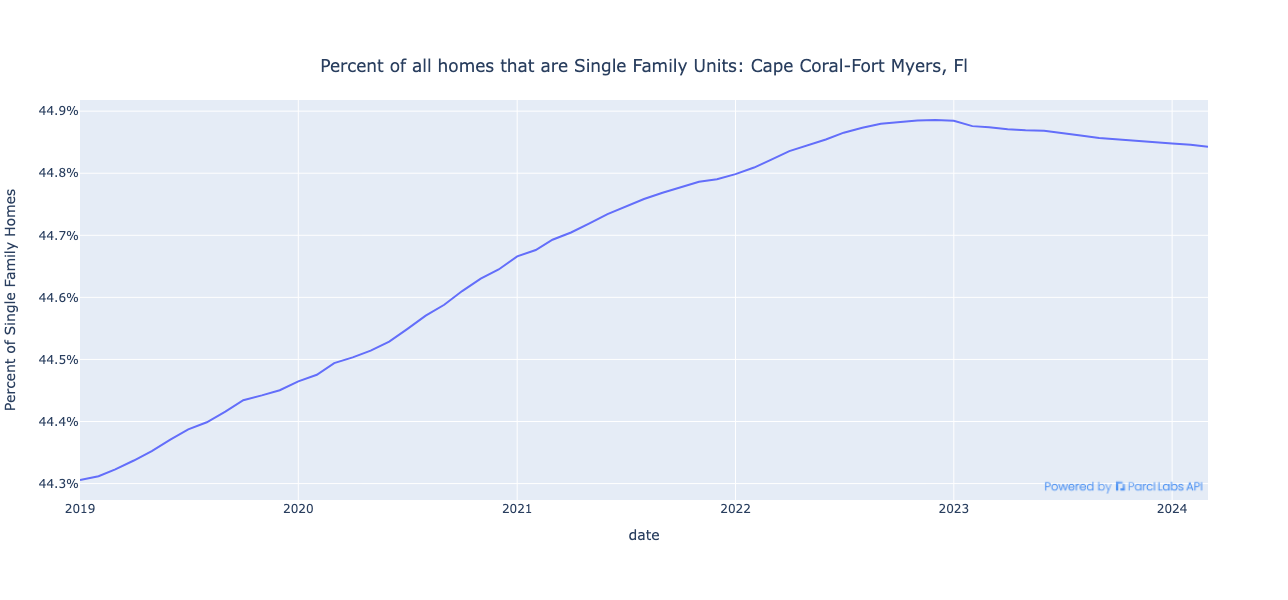

In [124]:
# citation reference
labs_logo_dict = dict(
        source="https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png",
        xref="paper",
        yref="paper",
        x=1,
        y=0, 
        sizex=0.15, 
        sizey=0.15,
        xanchor="right",
        yanchor="bottom"
)

# Creating the line chart
fig = px.line(
    housing_stock_cape_coral, 
    x='date', 
    y='pct_single_family', 
    title=f'Percent of all homes that are Single Family Homes in {name}',
    labels={'pct_single_family': 'Percent of Single Family Homes'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'text': f'Percent of all homes that are Single Family Units: {name}',
        'y':0.9,
        'x':0.5,  
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

fig.update_yaxes(tickformat=".1%")  # Formats as percentage with one decimal place

# Show the plot
fig.show()

In [81]:
# Now lets find out how much of this is owned by investors
investor_ownership = client.investor_metrics_housing_stock_ownership.retrieve(
    parcl_id=cape_coral_parcl_id,
    params={
        'limit': 200,
    },
    as_dataframe=True
)

# for graph formatting, divide pct_ownership by 100 since plotly handles this internally
investor_ownership['pct_ownership'] = investor_ownership['pct_ownership']/100

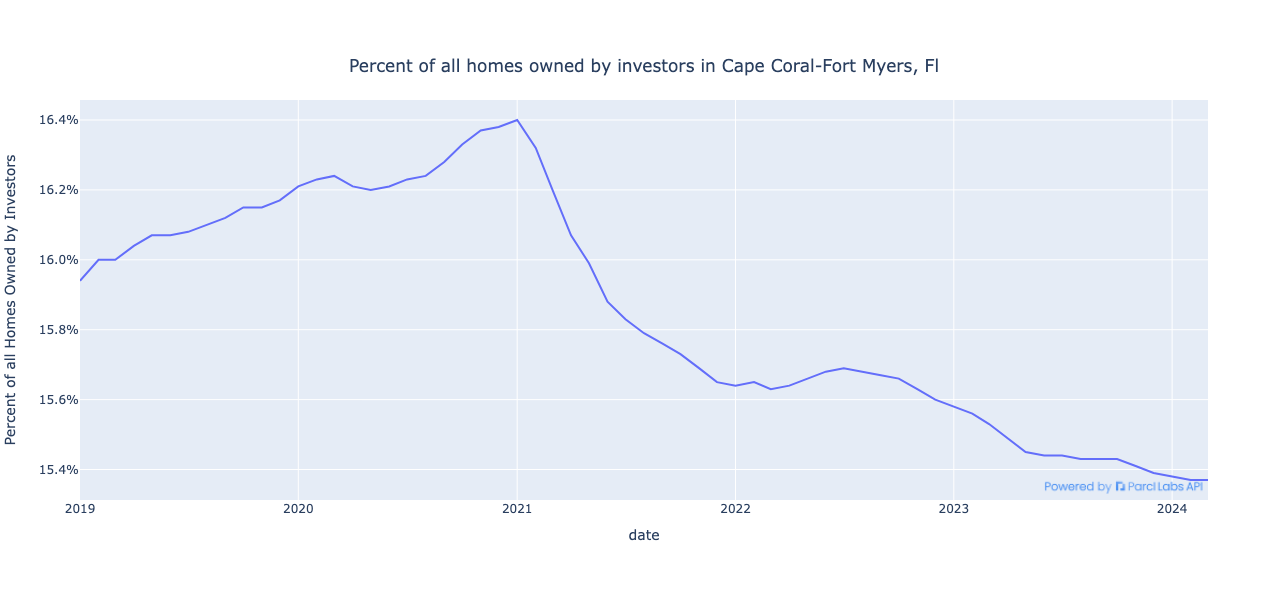

In [83]:
# Creating the line chart
fig = px.line(
    investor_ownership, 
    x='date', 
    y='pct_ownership', 
    title=f'Percent of all homes owned by investors in {name}',
    labels={'pct_ownership': 'Percent of all Homes Owned by Investors'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'text': f'Percent of all homes owned by investors in {name}',
        'y':0.9,
        'x':0.5,  
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

fig.update_yaxes(tickformat=".1%")  # Formats as percentage with one decimal place

# Show the plot
fig.show()

In [87]:
# How big are the investors? Let's find out
portfolio_size_ownership = client.portfolio_metrics_sf_housing_stock_ownership.retrieve(
    parcl_id=cape_coral_parcl_id,
    as_dataframe=True
)

portfolio_size_ownership

,date,count_portfolio_2_to_9,count_portfolio_10_to_99,count_portfolio_100_to_999,count_portfolio_1000_plus,count_all_portfolios,pct_sf_housing_stock_portfolio_2_to_9,pct_sf_housing_stock_portfolio_10_to_99,pct_sf_housing_stock_portfolio_100_to_999,pct_sf_housing_stock_portfolio_1000_plus,pct_sf_housing_stock_all_portfolios,parcl_id
0,2024-03-01,28401,3005,403,4196,36005,12.2,1.29,0.17,1.8,15.47,2899822


In [98]:
# lets focus on the percentages
pso_pcts = portfolio_size_ownership[[
    'date', 
    'pct_sf_housing_stock_portfolio_2_to_9', 
    'pct_sf_housing_stock_portfolio_10_to_99', 
    'pct_sf_housing_stock_portfolio_100_to_999',
    'pct_sf_housing_stock_portfolio_1000_plus',
    'pct_sf_housing_stock_all_portfolios'
]]

pso_pcts_long = pso_pcts.melt(id_vars=['date'], var_name='category', value_name='percentage')
pso_pcts_long['percentage'] = pso_pcts_long['percentage']/100

# rename to friendly labels
friendly_labels = {
    'pct_sf_housing_stock_portfolio_2_to_9': 'Investor Portfolio (2 to 9 Units)', 
    'pct_sf_housing_stock_portfolio_10_to_99': 'Investor Portfolio (10 to 99 Units)', 
    'pct_sf_housing_stock_portfolio_100_to_999': 'Investor Portfolio (100 to 999 Units)',
    'pct_sf_housing_stock_portfolio_1000_plus': 'Investor Portfolio (1000+ Units)',
    'pct_sf_housing_stock_all_portfolios': 'Investor Portfolio (All Sizes)'
}

pso_pcts_long['category'] = pso_pcts_long['category'].replace(friendly_labels)
pso_pcts_long

,date,category,percentage
0,2024-03-01,Investor Portfolio (2 to 9 Units),0.1220
1,2024-03-01,Investor Portfolio (10 to 99 Units),0.0129
2,2024-03-01,Investor Portfolio (100 to 999 Units),0.0017
3,2024-03-01,Investor Portfolio (1000+ Units),0.0180
4,2024-03-01,Investor Portfolio (All Sizes),0.1547


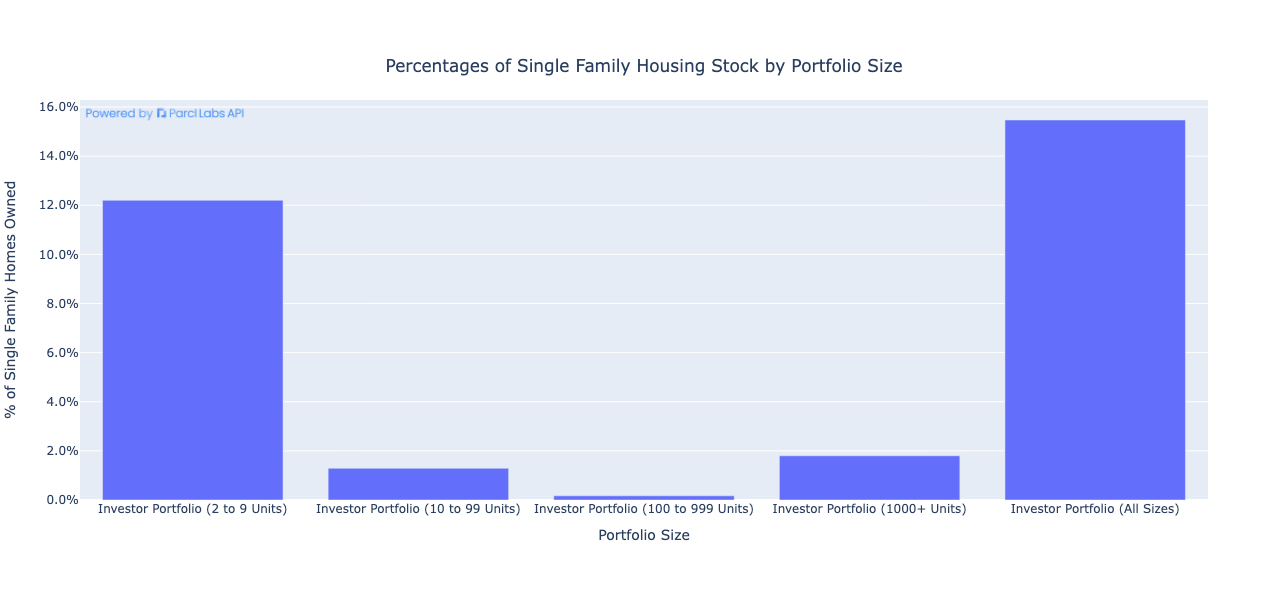

In [130]:
# Creating the bar chart
fig = px.bar(
    pso_pcts_long,
    x='category',
    y='percentage',
    title='Percentages of Single Family Housing Stock by Portfolio Size',
    labels={'percentage': '% of Single Family Homes Owned', 'category': 'Portfolio Size'}
)

# Adding the logo as previously defined in labs_logo_dict
fig.add_layout_image(
    dict(
        source="https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png",
        xref="paper",
        yref="paper",
        x=0,  # Position at the left edge of the plotting area
        y=1,  # Position at the top edge of the plotting area
        sizex=0.15,  # Relative size of the logo, adjust as needed
        sizey=0.15,  # Relative size of the logo, adjust as needed
        xanchor="left",  # Anchor the left side of the logo at x
        yanchor="top"   # Anchor the top of the logo at y
    )
)

# Update layout with centered title and margin
fig.update_layout(
    title={
        'text': 'Percentages of Single Family Housing Stock by Portfolio Size',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(b=100),
    height=600,
)

# Format y-axis to show percentage
fig.update_yaxes(tickformat=".1%")

# Show the plot
fig.show()

In [84]:
# now lets find out what percent of all homes are rental units

rental_unit_concentration = client.rental_market_metrics_rental_units_concentration.retrieve(
    parcl_id=cape_coral_parcl_id,
    params={
        'limit': 200
    },
    as_dataframe=True
)

# for graph formatting, divide pct_rental_concentration by 100 since plotly handles this internally
rental_unit_concentration['pct_rental_concentration'] = rental_unit_concentration['pct_rental_concentration']/100

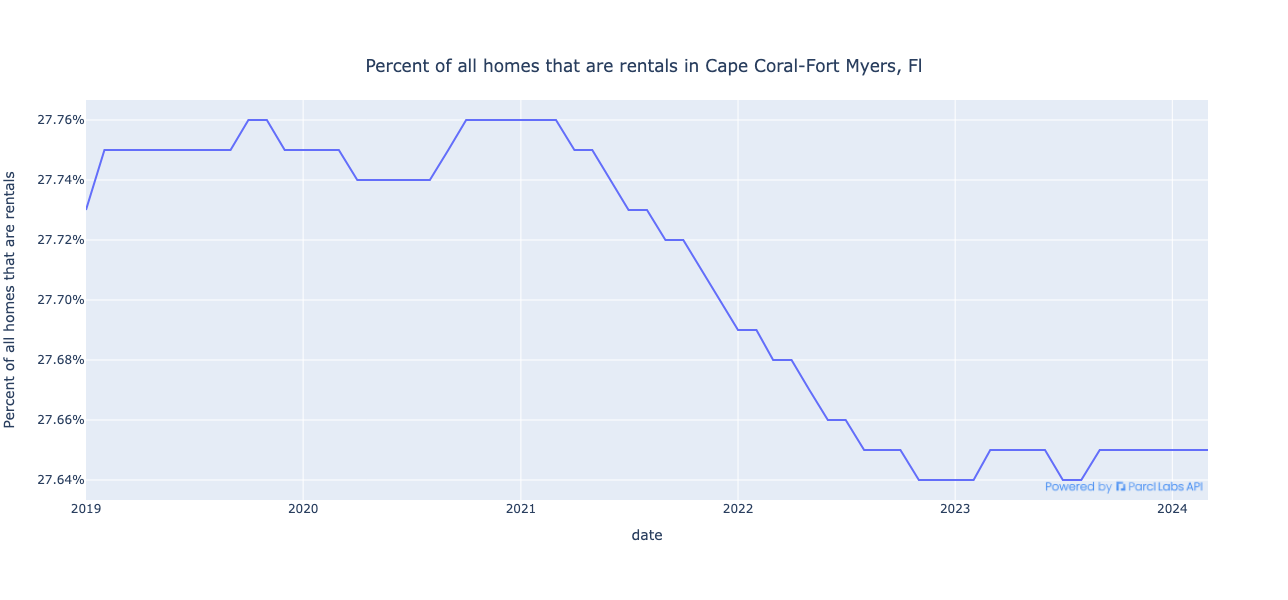

In [85]:
# Creating the line chart
fig = px.line(
    rental_unit_concentration, 
    x='date', 
    y='pct_rental_concentration', 
    title=f'Percent of all homes that are rentals in {name}',
    labels={'pct_rental_concentration': 'Percent of all homes that are rentals'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'text': f'Percent of all homes that are rentals in {name}',
        'y':0.9,
        'x':0.5,  
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

fig.update_yaxes(tickformat=".2%")  # Formats as percentage with one decimal place

# Show the plot
fig.show()

#### New Listings Analysis
Capture the change in new listings on a 7, 30, 60 and 90 day basis

In [20]:
# first order of business, lets see how new listings have changed over the last year
start_date = '2021-01-01'

new_listings = client.for_sale_market_metrics_new_listings_rolling_counts.retrieve(
    parcl_id=cape_coral_parcl_id,
    start_date=start_date,
    as_dataframe=True,
    params={
        'limit': 300
    }
)
new_listings.tail()

,date,rolling_7_day,rolling_30_day,rolling_60_day,rolling_90_day,parcl_id
168,2021-02-01,182,689,1191,1756,2899822
169,2021-01-25,141,585,1130,1710,2899822
170,2021-01-18,192,531,1138,1670,2899822
171,2021-01-11,154,471,1076,1638,2899822
172,2021-01-04,87,472,1044,1634,2899822


In [52]:
new_listings_long = pd.melt(
    new_listings, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['rolling_30_day', 'rolling_60_day', 'rolling_90_day'],
    value_name='Number of New Listings',
    var_name='Rolling Window (Days)'
)

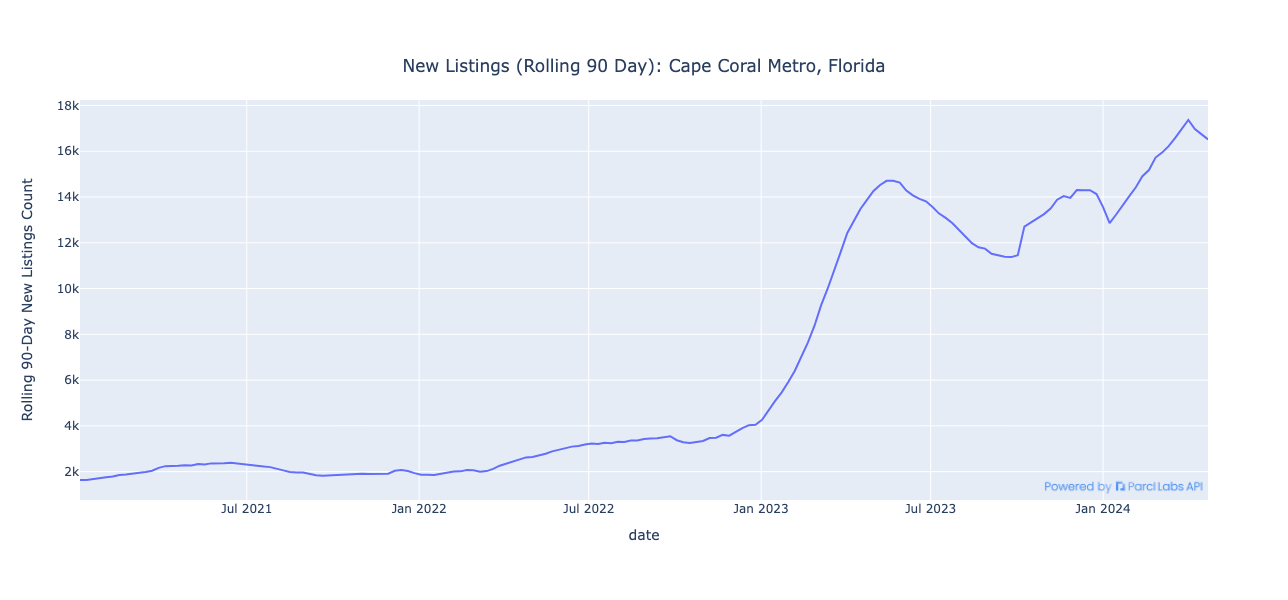

In [126]:
# Creating the line chart
fig = px.line(
    new_listings, 
    x='date', 
    y='rolling_90_day', 
    title='New Listings (Rolling 90 Day): Cape Coral Metro, Florida',
    labels={'rolling_90_day': 'Rolling 90-Day New Listings Count'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

# Show the plot
fig.show()

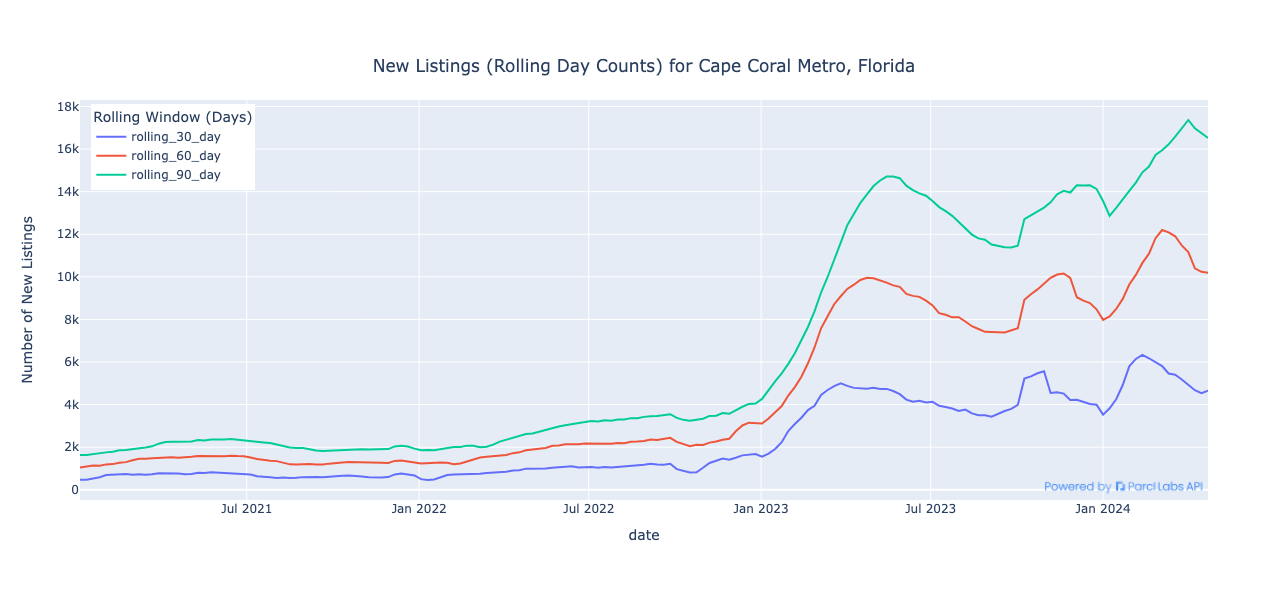

In [127]:
# Creating the line chart
fig = px.line(
    new_listings_long,
    x='date',
    y='Number of New Listings',
    color='Rolling Window (Days)',  # This will create a separate line for each rolling window
    title='New Listings (Rolling Day Counts) for Cape Coral Metro, Florida',
    labels={'count': 'Rolling Day Count'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

# Show the plot
fig.show()

In [114]:
# of listings on the market, what percent of them are coming from investors?

investor_listings = client.investor_metrics_new_listings_for_sale_rolling_counts.retrieve(
    parcl_id=cape_coral_parcl_id,
    params={
        'limit': 300
    },
    as_dataframe=True
)

investor_listings['pct_for_sale_market'] = investor_listings['pct_for_sale_market']/100
investor_listings.head(4)

,date,period,counts,pct_for_sale_market,parcl_id
0,2024-04-22,rolling_7_day,238,0.2116,2899822
1,2024-04-22,rolling_30_day,903,0.1942,2899822
2,2024-04-22,rolling_60_day,2016,0.1978,2899822
3,2024-04-22,rolling_90_day,3259,0.1973,2899822


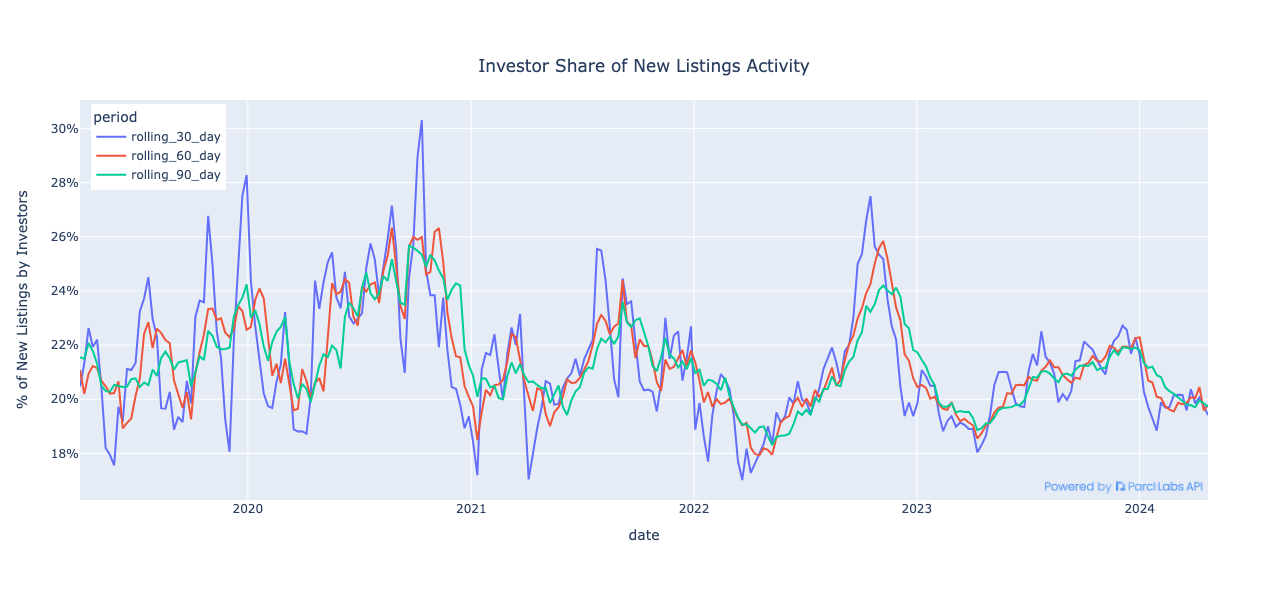

In [128]:
# Creating the line chart
fig = px.line(
    investor_listings.loc[investor_listings['period']!='rolling_7_day'],
    x='date',
    y='pct_for_sale_market',
    color='period',  # This will create a separate line for each rolling window
    title='Investor Share of New Listings Activity',
    labels={'pct_for_sale_market': '% of New Listings by Investors'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

# Format y-axis to show percentage
fig.update_yaxes(tickformat=".0%")

# Show the plot
fig.show()

### Price Activity

Let's review rental prices, new listing prices and home sales prices. 

In [136]:
# Prices
prices = client.market_metrics_housing_event_prices.retrieve(
    parcl_id=cape_coral_parcl_id,
    as_dataframe=True,
    params={
        'limit': 300
    }
)

prices_long = prices[['date', 'parcl_id', 'price_median_sales', 'price_median_new_listings_for_sale']]

prices_long = pd.melt(
    prices_long, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['price_median_sales', 'price_median_new_listings_for_sale'],
    value_name='Median Price ($)',
    var_name='Type'
)

r = {
    'price_median_sales': 'Median Sales Price',
    'price_median_new_listings_for_sale': 'Median New Listing Price'
}

prices_long['Type'] = prices_long['Type'].replace(r)

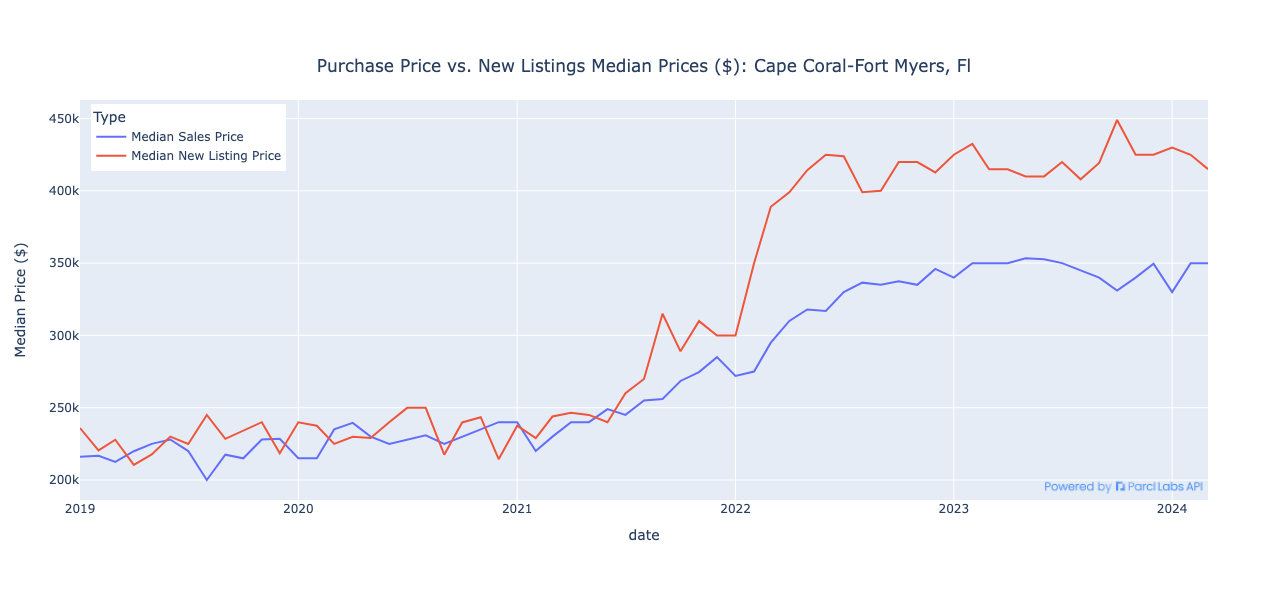

In [137]:
# Creating the line chart
fig = px.line(
    prices_long,
    x='date',
    y='Median Price ($)',
    color='Type',
    title=f'Purchase Price vs. New Listings Median Prices ($): {name}',
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

# Show the plot
fig.show()

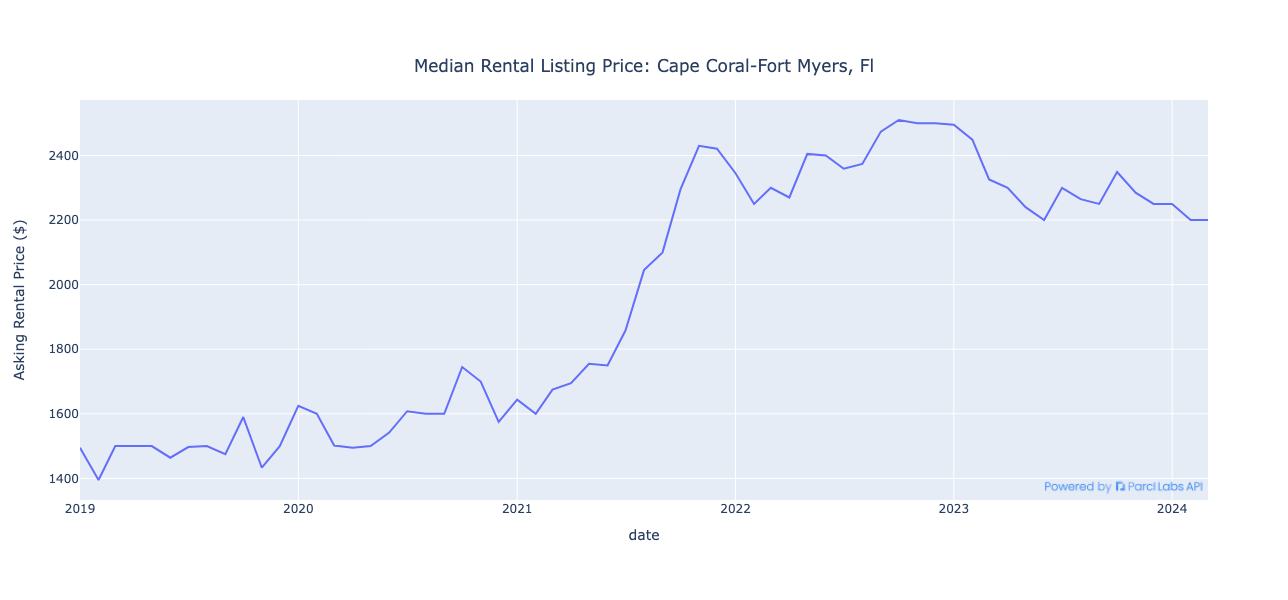

In [140]:
# and what about rental prices?
# Creating the line chart
fig = px.line(
    prices, 
    x='date', 
    y='price_median_new_rental_listings', 
    title=f'Median Rental Listing Price: {name}',
    labels={'price_median_new_rental_listings': 'Asking Rental Price ($)'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

# Show the plot
fig.show()